# doing more with data

  1. download the file
  2. unzip it
  3. read it and convert to pandas dataframe
  4. build a machine learning prediction engine


Download link: https://www.dropbox.com/s/u6rtu7a7clb4k3x/yelp_training_set_review.json.zip?dl=1


In [1]:
import requests
import humanize
from __future__ import print_function
import zipfile
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from StringIO import StringIO
from lxml import etree

In [2]:
humanize.naturalsize(10000000)

'10.0 MB'

In [3]:
file_url = "https://www.dropbox.com/s/u6rtu7a7clb4k3x/yelp_training_set_review.json.zip?dl=1"
r = requests.get(file_url, stream=True)
out = "yelp_training_set_review.json.zip"
out_size = 0
with open(out, "wb") as f:
    chunk_size = 10000000
    for chunk in r.iter_content(chunk_size=chunk_size):
        if chunk:
            out_size += chunk_size
            print("wrote {}".format(humanize.naturalsize(out_size)))
            f.write(chunk)
print("done")


wrote 10.0 MB
wrote 20.0 MB
wrote 30.0 MB
wrote 40.0 MB
wrote 50.0 MB
wrote 60.0 MB
wrote 70.0 MB
wrote 80.0 MB
wrote 90.0 MB
done


In [4]:
out = "yelp_training_set_review.json.zip"
zipf = zipfile.ZipFile(out)

In [5]:
zipf.printdir()

File Name                                             Modified             Size
yelp_training_set_review.json                  2015-11-17 14:44:10    216292386
__MACOSX/                                      2016-04-24 22:07:00            0
__MACOSX/._yelp_training_set_review.json       2015-11-17 14:44:10          583


In [6]:
jsons = []
[jsons.append(x) for x in zipf.read('yelp_training_set_review.json').split("\n")[:20000]]
len(jsons)

20000

In [7]:
json_str = "[{}]".format(",".join(jsons))
df = pd.read_json(json_str)
df

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,"{u'funny': 1, u'useful': 3, u'cool': 4}"
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,"{u'funny': 4, u'useful': 7, u'cool': 7}"
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,"{u'funny': 0, u'useful': 1, u'cool': 0}"
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,"{u'funny': 0, u'useful': 0, u'cool': 0}"
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"


In [8]:
for classtype in ('funny', 'useful', 'cool'):
    df[classtype] = map(lambda votes: votes[classtype], df['votes'])
    

In [9]:
df.drop(['business_id', 'review_id', 'type', 'user_id', 'votes'], axis=1, inplace=True)

In [10]:
df

,date,stars,text,funny,useful,cool
0,2011-01-26,5,My wife took me here on my birthday for breakf...,0,5,2
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0,2,1
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0
5,2007-12-13,4,"Quiessence is, simply put, beautiful. Full wi...",1,3,4
6,2010-02-12,5,Drop what you're doing and drive here. After I...,4,7,7
7,2012-07-12,4,"Luckily, I didn't have to travel far to make m...",0,1,0
8,2012-08-17,4,Definitely come for Happy hour! Prices are ama...,0,0,0
9,2010-08-11,5,Nobuo shows his unique talents with everything...,0,1,0


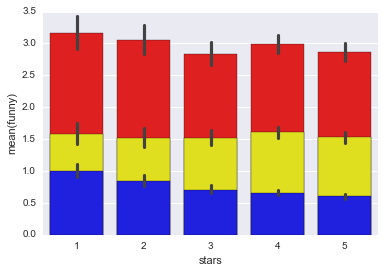

In [11]:
%matplotlib inline

sns.barplot(x=df.stars, y=df.useful+df.cool+df.funny, color="red")
sns.barplot(x=df.stars, y=df.cool+df.funny, color="yellow")
sns.barplot(x=df.stars, y=df.funny, color="blue")


In [12]:
df_funny = df.loc[df['funny'] != 0]
df_not_funny = df.loc[df['funny'] == 0]
df_funny['funny'] = True
df_not_funny['funny'] = False

df_half_funny = pd.concat([df_funny, df_not_funny])
df_half_funny

/Users/rayb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/rayb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date,stars,text,funny,useful,cool
5,2007-12-13,4,"Quiessence is, simply put, beautiful. Full wi...",True,3,4
6,2010-02-12,5,Drop what you're doing and drive here. After I...,True,7,7
10,2010-06-16,5,The oldish man who owns the store is as sweet ...,True,3,1
16,2008-10-12,3,We went here on a Saturday afternoon and this ...,True,4,3
18,2009-03-06,3,I met a friend for lunch yesterday. \n\nLoved ...,True,6,5
19,2011-11-17,4,They've gotten better and better for me in the...,True,1,1
20,2008-10-08,3,DVAP....\n\nYou have to go at least once in yo...,True,4,2
21,2011-06-28,5,This place shouldn't even be reviewed - becaus...,True,1,1
23,2010-09-05,1,U can go there n check the car out. If u wanna...,True,1,0
27,2008-03-21,4,Not that my review will mean much given the mo...,True,4,2


In [13]:
from sklearn.cross_validation import train_test_split
train, test, labels_train, labels_test = train_test_split(df_half_funny['text'].values,
                                                          df_half_funny['funny'].values,
                                                          test_size=0.20,
                                                          random_state=42)

/Users/rayb/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('count_vectorize', CountVectorizer(ngram_range=(1, 3))),
    ('tfidf_trandformer', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(train, labels_train)




Pipeline(steps=[('count_vectorize', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [15]:
pipeline.score(test, labels_test)

0.70650000000000002

In [16]:
from sklearn.metrics import confusion_matrix

pred_label_test = pipeline.predict(test)
confusion_matrix(labels_test, pred_label_test)

array([[2759,   54],
       [1120,   67]])

In [17]:
pipeline.predict_proba(["I went to the cheese shop and there wasn't any cheese",])

array([[ 1.,  0.]])

In [18]:
scores = pipeline.predict_proba(test)
scores

array([[ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       ..., 
       [ 0.9,  0.1],
       [ 0.5,  0.5],
       [ 0.9,  0.1]])

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(labels_test, [x[0]*-1 for x in scores])
fpr, tpr

(array([ 0.        ,  0.00106648,  0.00533239,  0.01919659,  0.04870245,
         0.04905795,  0.139353  ,  0.29363669,  0.29576964,  0.53643797,
         0.53928191,  0.82154284,  0.82189833,  0.82616424,  1.        ]),
 array([  8.42459983e-04,   7.58213985e-03,   2.27464195e-02,
          5.64448189e-02,   1.24684078e-01,   1.24684078e-01,
          2.58635215e-01,   4.44818871e-01,   4.44818871e-01,
          6.77337826e-01,   6.81550126e-01,   8.81213142e-01,
          8.81213142e-01,   8.83740522e-01,   1.00000000e+00]))

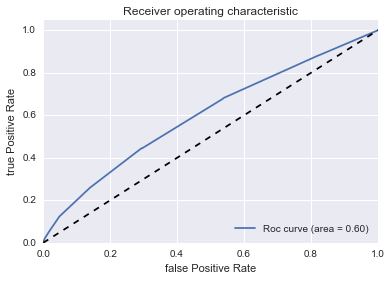

In [20]:
plt = pyplot
plt.figure()
plt.plot(fpr, tpr, label="Roc curve (area = %0.2f)" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("false Positive Rate")
plt.ylabel("true Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Homework

Do the same thing with the NHTSA. Consider building a prediction based off if the report was labeled with a injury. There is an injury column in the data. 


In [21]:
r = requests.get("https://www.dropbox.com/s/fjwu5iassqtsnyo/nhtsa_as_xml.zip?dl=1")
zipf = zipfile.ZipFile(StringIO(r.content))

In [22]:
injured_file = zipf.read("nhtsa_injured.xml")
not_injured_file = zipf.read("nhtsa_not_injured.xml")

In [23]:
itree = etree.parse(StringIO(injured_file))
nitree = etree.parse(StringIO(not_injured_file))

In [24]:
data = zip(itree.xpath("//rows/row/@c2"), itree.xpath("//rows/row/@c8")) + zip(nitree.xpath("//rows/row/@c2"), nitree.xpath("//rows/row/@c8"))

In [25]:
len(data)

4000